In [98]:
import networkx as nx
import math
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [2]:
data = sio.loadmat('Data.mat')['D']
print(data.shape)
df = pd.DataFrame(data)
df.head()

(10000, 8)


0         1         2         3         4         5         6  \
0  0.110542  1.042710 -1.575183  1.055074 -0.148899  1.062382  0.116945   
1  1.397050  0.257278 -0.351936 -0.232494  1.344092 -0.060821  0.387983   
2  0.690281  1.321500  1.417502  0.982115 -0.716820 -0.508841 -1.768362   
3 -0.634045 -1.255488 -0.578344 -0.305612  0.273759  0.533964 -1.647791   
4 -0.376387  0.863437 -0.296768  0.625518 -0.577722  0.855256  2.067983   

          7  
0 -0.244467  
1  1.618541  
2  2.926619  
3 -0.963040  
4 -0.582378

In [3]:
G = nx.Graph()
vertex_set = [i for i in range(df.shape[1])]

In [4]:
for v in vertex_set:
    G.add_node(v)

# Implementation of PC pop Algorithm

In [31]:
def nodes_connected(u, v):
    return u in G.neighbors(v)

In [36]:
def compute_pairs():
    adj_vertices = []
    for i in range(len(vertex_set)):
        for j in range(i+1, len(vertex_set)):
            if nodes_connected(vertex_set[i], vertex_set[j]):
                adj_vertices.append((vertex_set[i], vertex_set[j]))
    return adj_vertices

In [88]:
def remove_in_adj(x, y):
    result = set()
    for i in G.adj[x]:
        if i != y:
            result.add(i)
    return result

In [125]:
def compute_subsets(set_, k):
    return list(itertools.combinations(set_, k))

In [132]:
def finished(d):
    all_done = True
    for (x, y) in compute_pairs():
        new_adj_set = remove_in_adj(x, y)
        if len(new_adj_set) >= d:
            all_done = False
    return all_done

In [133]:
def pc_pop_algo(vertex_set, df, alpha):
    #First step: Construct the complete undirected graph on the vertex set V
    for i in range(len(vertex_set)):
        for j in range(i+1, len(vertex_set)):
            G.add_edge(vertex_set[i], vertex_set[j])
    #Second step: Perform conditional independence tests at a given significance level α 
    #and delete edges based on the tests.
    d = 0
    all_done = False
    
    while not finished(d):
    for (x, y) in compute_pairs():
        new_adj_set = remove_in_adj(x, y)
        if len(new_adj_set) >= d:
            for z in compute_subsets(new_adj_set, d):
                #Test conditional independance I(x, y | z) and remove edge
                
    

IndentationError: expected an indented block (<ipython-input-133-ab6f7846d529>, line 12)

# Try it

In [130]:
pc_pop_algo(vertex_set, df, 0)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
1 2
1 3
1 4
1 5
1 6
1 7
2 3
2 4
2 5
2 6
2 7
3 4
3 5
3 6
3 7
4 5
4 6
4 7
5 6
5 7
6 7


/Users/valentingarnier/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


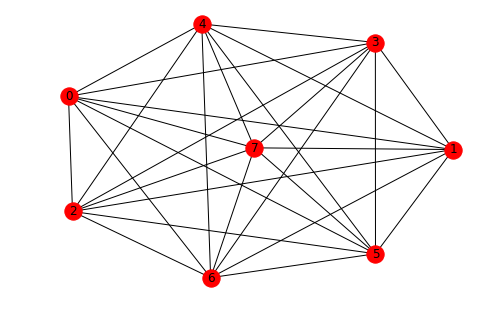

In [7]:
nx.draw(G, with_labels = True)